In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
import umap
import seaborn as sns

In [4]:

texts = [
  "apple orange pear", "apple pear quince",
  "apple pear orange quince peach avocado kiwi physalis"
]
vec = CountVectorizer()
dfmat = vec.fit_transform(texts)
dist_dfmat = cosine_similarity(dfmat)
dist_dfmat

array([[1.        , 0.66666667, 0.61237244],
       [0.66666667, 1.        , 0.61237244],
       [0.61237244, 0.61237244, 1.        ]])

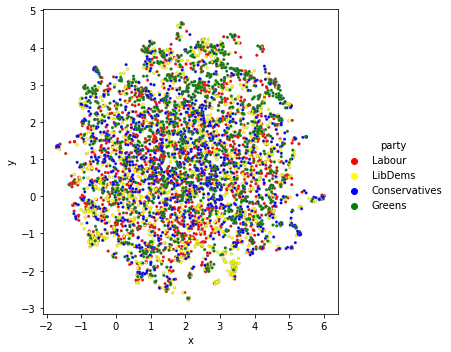

In [6]:

df = pd.read_csv("data/uk_manifestos.csv")
vec = TfidfVectorizer(min_df=5, stop_words="english")
dfmat = vec.fit_transform(df["text"])
cdict = {
    'Labour': 'red',
    'LibDems': 'yellow',
    'Conservatives': 'blue',
    'Greens': 'green'
}
reducer = umap.UMAP()
embeddings = reducer.fit_transform(dfmat)
df["x"] = embeddings[:,0]
df["y"] = embeddings[:,1]
sns.relplot(
  data=df, x="x", y="y", hue="party", edgecolor="grey",
  s=8, palette=cdict, facet_kws={"despine": False}
)

In [7]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

datasource = ColumnDataSource(df)
color_mapping = CategoricalColorMapper(
    palette=list(cdict.values()),
    factors=list(cdict.keys())
)

plot_figure = figure(
    title='UMAP projection of UK manifestos',
    plot_width=600,plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(
    tooltips="<span>@text</span>"
))

plot_figure.circle(
    'x','y',source=datasource,
    fill_color=dict(field='party', transform=color_mapping),
    line_color="grey",line_alpha=0.6,fill_alpha=0.6,size=4
)
show(plot_figure)

Loading BokehJS ...